In [1]:
from google.colab import files
uploaded = files.upload()


Saving Colorectal Cancer Gene Expression Data.csv to Colorectal Cancer Gene Expression Data.csv


In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Colorectal Cancer Gene Expression Data.csv")

# Drop unnecessary columns
data = data.drop(columns=["Unnamed: 0", "ID_REF"])


In [7]:
# Check the column names
print(data.columns)

# Display the last few rows to see if labels exist in the dataset
print(data.tail())


Index(['GSM877126', 'GSM877127', 'GSM877128', 'GSM877129', 'GSM877130',
       'GSM877131', 'GSM877132', 'GSM877133', 'GSM877134', 'GSM877135',
       'GSM877136', 'GSM877137', 'GSM877138', 'GSM877139', 'GSM877140',
       'GSM877141', 'GSM877142', 'GSM877143', 'GSM877144', 'GSM877145',
       'GSM877146', 'GSM877147', 'GSM877148', 'GSM877149', 'GSM877150',
       'GSM877151', 'GSM877152', 'GSM877153', 'GSM877154', 'GSM877155',
       'GSM877156', 'GSM877157', 'GSM877158', 'GSM877159', 'GSM877160',
       'GSM877161', 'GSM877162', 'GSM877163', 'GSM877164', 'GSM877165',
       'GSM877166', 'GSM877167', 'GSM877168', 'GSM877169', 'GSM877170',
       'GSM877171', 'GSM877173', 'GSM877174', 'GSM877175', 'GSM877176',
       'GSM877177', 'GSM877178', 'GSM877179', 'GSM877180', 'GSM877181',
       'GSM877182', 'GSM877183', 'GSM877184', 'GSM877185', 'GSM877186',
       'GSM877187', 'GSM877188'],
      dtype='object')
      GSM877126  GSM877127  GSM877128  GSM877129  GSM877130  GSM877131  \
1930  

In [10]:
data.rename(columns=lambda x: x.strip(), inplace=True)  # Remove extra spaces


In [12]:
# Transpose the dataset
X = data.transpose()

# Set feature names using row indices
X.columns = data.index

# Print the resulting DataFrame
print(X.head())


               0          1         2         3         4         5     \
GSM877126  6.029834   9.468893  7.187090  6.807582  3.084591  7.397013   
GSM877127  6.344321   9.994204  7.705626  6.893130  3.118704  7.163797   
GSM877128  5.023127  10.409823  7.934057  7.165602  2.984632  7.375224   
GSM877129  4.612727  10.596921  7.446374  7.071417  2.912851  7.596233   
GSM877130  5.865944  10.252547  7.141105  7.103383  3.383726  7.278244   

               6         7         8         9     ...      1925      1926  \
GSM877126  6.525426  3.848253  7.572331  3.748200  ...  3.504809  2.856109   
GSM877127  6.391195  4.202085  8.295322  3.114340  ...  3.957833  2.988643   
GSM877128  5.538846  4.074462  7.055579  4.172270  ...  3.749518  2.610840   
GSM877129  5.989148  3.738205  9.683806  3.625413  ...  3.610429  2.728274   
GSM877130  5.678236  4.141955  7.360892  3.338311  ...  3.520434  2.664744   

               1927      1928      1929      1930      1931      1932  \
GSM877126  3.

In [13]:
labels = ['Cancer'] * 25 + ['Healthy'] * 37


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Transpose the dataset and set feature names
X = data.transpose()
X.columns = data.index

# Create dummy labels
labels = ['Cancer'] * 25 + ['Healthy'] * 37

# Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.60      0.75      0.67         8

    accuracy                           0.54        13
   macro avg       0.47      0.47      0.46        13
weighted avg       0.50      0.54      0.51        13



In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Use cross-validation to evaluate the model performance
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {np.mean(scores)}")


Cross-validated accuracy: 0.5641025641025641


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1 4]
 [2 6]]


In [17]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters and model performance
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.60      0.75      0.67         8

    accuracy                           0.54        13
   macro avg       0.47      0.47      0.46        13
weighted avg       0.50      0.54      0.51        13



In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train the Random Forest model with the resampled data
model = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=1)
model.fit(X_res, y_res)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.73      1.00      0.84         8

    accuracy                           0.77        13
   macro avg       0.86      0.70      0.71        13
weighted avg       0.83      0.77      0.74        13



In [19]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores:", svm_scores)

# Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", lr_scores)


SVM Cross-Validation Scores: [0.8        0.7        0.7        0.9        0.77777778]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Scores: [0.8        0.6        0.8        0.9        0.77777778]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[2 3]
 [0 8]]


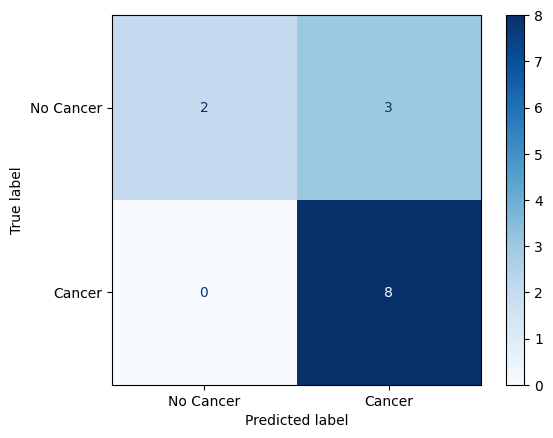

NameError: name 'y_pred_prob' is not defined

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Cancer", "Cancer"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
print("AUC: ", roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Confusion Matrix:
 [[2 3]
 [0 8]]


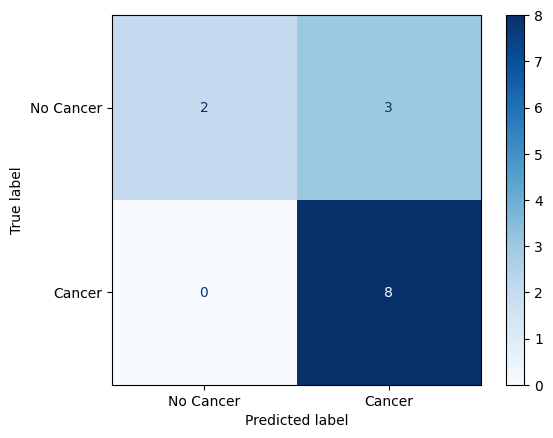

AUC:  0.675


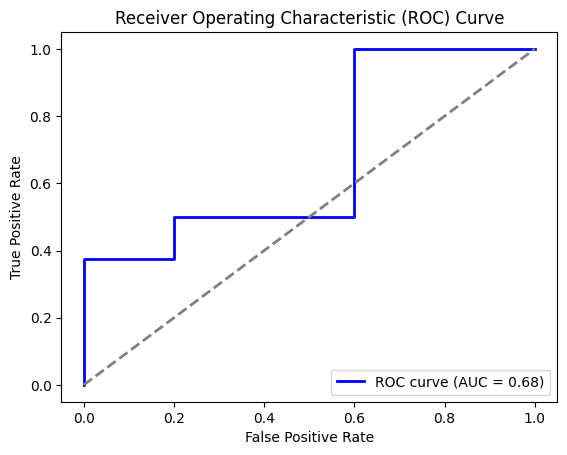

In [22]:
# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Cancer", "Cancer"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])  # Use the probabilities for the positive class (index 1)
roc_auc = auc(fpr, tpr)
print("AUC: ", roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [26]:
import joblib

# Save the trained model with a new name
joblib.dump(model, 'colorectal_cancer_model.pkl')


['colorectal_cancer_model.pkl']

In [27]:
from google.colab import files

# Download the model with the new name
files.download('colorectal_cancer_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>